In [1]:
import  json
import requests
import pandas as pd
import numpy as np
import os,shutil

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
import string

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amird\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amird\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## code to break out law type in map

In [2]:
f = open("map.txt", "r")
content = f.read()
content

"1 -> Administrative Law\n2 -> Admiralty\n3 -> Agriculture\n4 -> Antitrust &amp; Trade Regulation\n5 -> Attorney's Fees\n6 -> Banking Law\n7 -> Bankruptcy Law\n8 -> Civil Procedure\n9 -> Civil Rights\n10 -> Class Actions\n11 -> Commercial Law\n12 -> Communications Law\n13 -> Constitutional Law\n14 -> Construction\n15 -> Consumer Protection Law\n16 -> Contracts\n17 -> Corp. Governance\n18 -> Corporation &amp; Enterprise Law\n19 -> Criminal Law &amp; Procedure\n20 -> Habeas Corpus\n21 -> Sentencing\n22 -> Cyberspace Law\n23 -> Debt Collection\n24 -> Dispute Resolution &amp; Arbitration\n25 -> Drugs &amp; Biotech\n31 -> ERISA\n26 -> Education Law\n27 -> Elder Law\n28 -> Elections\n29 -> Entertainment Law\n30 -> Environmental Law\n32 -> Ethics &amp; Disciplinary Code\n33 -> Ethics &amp; Professional Responsibility\n34 -> Evidence\n35 -> False Advertising\n36 -> Family Law\n37 -> Gaming Law\n38 -> Government Benefits\n39 -> Government Contracts\n40 -> Government Law\n41 -> Health Law\n42 ->

In [3]:
lawcat=content.splitlines()
f.close()

In [4]:
catagories=[]
for itemset in lawcat:
    meepset=itemset.partition('->')
    catagories.append(meepset)

In [5]:
data=pd.DataFrame(columns=['case_text','case_type'])

In [6]:
main_directory=os.getcwd()

pathToText='raw_cases\\raw_cases'

In [7]:
path=os.path.join(main_directory,pathToText)

In [8]:
masterpath=os.listdir(path)

In [9]:
counterfordocuments=1

for folder in masterpath[:-1]:
    subfile=os.listdir(os.path.join(path,folder))
    for rawtext in subfile:
        with open(os.path.join(path,folder)+'/' +rawtext,'r',encoding='utf-8') as f:
            content=f.read()
            vardict=pd.DataFrame({'case_text':content,'case_type':folder},index=[counterfordocuments])
            data=data.append(vardict)
            counterfordocuments+= 1

# remap numbers to text

In [10]:
law_cat_map={}
for item in catagories:
    law_cat_map[item[0].strip()]=item[2]

In [11]:
law_type_df=data.replace({'case_type':law_cat_map})


In [12]:
law_type_df.groupby(['case_type']).count().sort_values(by=['case_text'],ascending=False)

,case_text
case_type,
Immigration Law,2332
Insurance Law,1569
Habeas Corpus,1511
Health Law,1455
Family Law,1203
...,...
Tax-exempt Organizations,74
Judges &amp; Judiciary,65
Legal Malpractice,61


<AxesSubplot:ylabel='case_type'>

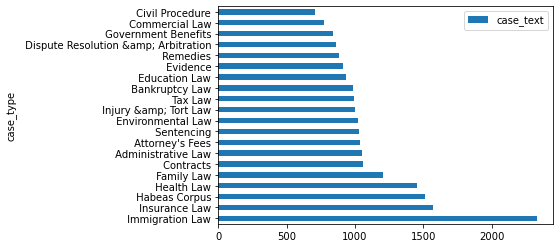

In [13]:
law_type_df.groupby(['case_type']).count().sort_values(by=['case_text'],ascending=False)[0:20].plot(kind='barh')

In [14]:
forcasename=law_type_df.groupby(['case_type']).count().sort_values(by=['case_text'],ascending=False)[0:20]

In [15]:
caselist20=list(forcasename.index)

In [16]:
data_frame20=pd.DataFrame(columns=['case_text','case_type'])
for casetype in caselist20:
    tempval=law_type_df[law_type_df.case_type==casetype]
    data_frame20=data_frame20.append(tempval)




In [17]:
data_frame20.reset_index() #may need this later

,index,case_text,case_type
0,20813,"Any alien convicted of an ""aggravated felony"" ...",Immigration Law
1,20814,"Petitioner Moones Mellouli, a lawful permanent...",Immigration Law
2,20815,Before passage of the Illegal Immigration Refo...,Immigration Law
3,20816,"Petitioner Alexon Nassaralla Lamim, a native a...",Immigration Law
4,20817,"Plaintiff-appellant, Kai Tung Chan, appeals fr...",Immigration Law
...,...,...,...
22157,38285,The parties-who agree on little else-mutually ...,Civil Procedure
22158,38286,This case involves the power of a district cou...,Civil Procedure
22159,38287,Non-party appellants Stone & Webster Engineeri...,Civil Procedure
22160,38288,"On October 8, 1999, plaintiff-appellant José A...",Civil Procedure


# check point

In [18]:
data_frame20.case_type.value_counts()

 Immigration Law                         2332
 Insurance Law                           1569
 Habeas Corpus                           1511
 Health Law                              1455
 Family Law                              1203
 Contracts                               1059
 Administrative Law                      1053
 Attorney's Fees                         1034
 Sentencing                              1032
 Environmental Law                       1024
 Injury &amp; Tort Law                   1000
 Tax Law                                  991
 Bankruptcy Law                           988
 Education Law                            936
 Evidence                                 912
 Remedies                                 883
 Dispute Resolution &amp; Arbitration     864
 Government Benefits                      836
 Commercial Law                           771
 Civil Procedure                          709
Name: case_type, dtype: int64

In [19]:
import lexnlp.nlp.en.tokens
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
# def preprocess(data,infuctfidf,relevantwords):
    
#     # lemmatize
#     def lemmadata(doc):
#         pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
#         raw_tokens = nltk.regexp_tokenize(doc, pattern)
#         tokens = [i.lower() for i in raw_tokens]
#         stop_words = set(stopwords.words('english'))
#         listed = [w for w in tokens if not w in stop_words]
#         lemmatized = [wordnet_lemmatizer.lemmatize(word, pos="v") for word in listed]
#         lemmatized = list(filter(lambda w: w != 'lb', lemmatized))
#         words = list(filter(lambda w: w in english, lemmatized))
#         return " ".join(words)
    
#     lemmatized = [lemmadata(post) for post in data]
    
#     tfidf = pickle.load(open("pickles/tfidf.pkl", "rb"))
    
#     transformed = tfidf.transform(lemmatized)
#     tfidf_df = pd.DataFrame(transformed.toarray(), columns=tfidf.get_feature_names())
    
#     relevant = pickle.load(open("pickles/relevantwords.pkl", "rb"))
    
#     testset = [tfidf_df[word] for word in relevant if word in tfidf_df.columns]
    
#     return pd.DataFrame(testset).transpose()

In [36]:
# def clean_by_case_data(case,dataset_infunc):
    
#     textdata=dataset_infunc['case_text']
#     target = dataset_infunc['case_type']
#     processed_data= [lexnlp.nlp.en.tokens.get_token_list(d, lowercase=True, stopword=True) for d in textdata.tolist()]
    
#     sw_list = stopwords.words('english')
#     sw_list += list(string.punctuation)
#     sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©','-', '–', '—','()','( )','(']
#     sw_set = set(sw_list)
    
#     lemmatizer = WordNetLemmatizer() 

#     lemmatized_output = []

#     for listy in processed_data:
#         lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
#         lemmatized_output.append(lemmed)
        
#     into_vectorx = lemmatized_output
    
#     relevant = pd.DataFrame()
    
    
#     X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(into_vectorx, target, test_size=0.20, random_state=1)
    
#     tfidf = TfidfVectorizer(stop_words=sw_set)
    
#     tfidf_data_train_lem = tfidf.fit_transform(X_train_lem)
#     tfidf_data_test_lem = tfidf.transform(X_test_lem)

    
#     return X_train_lem, X_test_lem, y_train_lem, y_test_lem,tfidf,tfidf_data_train_lem,tfidf_data_test_lem;

In [21]:
def clean_by_case_data(relevancy,dataset_infunc):
    
    textdata=dataset_infunc['case_text']
    target = dataset_infunc['case_type']
    processed_data= [lexnlp.nlp.en.tokens.get_token_list(d, lowercase=True, stopword=True) for d in textdata.tolist()]
    
    sw_list = stopwords.words('english')
    sw_list += list(string.punctuation)
    sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©','-', '–', '—','()','( )','(']
    sw_set = set(sw_list)
    
    lemmatizer = WordNetLemmatizer() 

    lemmatized_output = []

    for listy in processed_data:
        lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
        lemmatized_output.append(lemmed)
        
    into_vectorx = lemmatized_output
    
    if relevancy=='ngram':
    
        relevantTrain=[]
       
        tfidf = TfidfVectorizer(stop_words=sw_set,ngram_range=(0,2),min_df=.1)
    
        tfidf_data_train_lem = tfidf.fit_transform(into_vectorx)
        
        Xtrain_relevant=pd.DataFrame(tfidf_data_train_lem.todense(),columns = tfidf.get_feature_names())
        
#         for word in Xtrain_relevant.columns:
#             if Xtrain_relevant[word].mean() > 0.0001:
#                 relevantTrain.append(Xtrain_relevant[word])
                
#         return relevantTrain,target
                
        return Xtrain_relevant,target
    
    if relevancy=='ngram3':
    
        relevantTrain=[]
       
        tfidf = TfidfVectorizer(stop_words=sw_set,ngram_range=(0,3),min_df=.1)
    
        tfidf_data_train_lem = tfidf.fit_transform(into_vectorx)
        
        Xtrain_relevant=pd.DataFrame(tfidf_data_train_lem.todense(),columns = tfidf.get_feature_names())
        
#         for word in Xtrain_relevant.columns:
#             if Xtrain_relevant[word].mean() > 0.0001:
#                 relevantTrain.append(Xtrain_relevant[word])
                
#         return relevantTrain,target
                
        return Xtrain_relevant,target
    
    elif relevancy== True:
        
        relevantTrain=[]
       
        tfidf = TfidfVectorizer(stop_words=sw_set)
    
        tfidf_data_train_lem = tfidf.fit_transform(into_vectorx)
        
        Xtrain_relevant=pd.DataFrame(tfidf_data_train_lem.todense(),columns = tfidf.get_feature_names())
        
        for word in Xtrain_relevant.columns:
            if Xtrain_relevant[word].mean() > 0.0001:
                relevantTrain.append(Xtrain_relevant[word])
        

        
        
        return relevantTrain,target
#         return X_train_lem, X_test_lem, y_train_lem, y_test_lem,tfidf,relevantTrain,relevantTest,relevant_frame;
        
    else:
    
        X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(into_vectorx, target, test_size=0.20, random_state=1)
    
        tfidf = TfidfVectorizer(stop_words=sw_set)
    
        tfidf_data_train_lem = tfidf.fit_transform(X_train_lem)
        tfidf_data_test_lem = tfidf.transform(X_test_lem)

    
        return X_train_lem, X_test_lem, y_train_lem, y_test_lem,tfidf,tfidf_data_train_lem,tfidf_data_test_lem

In [22]:
Xtrain,Xtest,Ytrain,Ytest,origtfidfmodelvec,Xtrain_trans,Xtest_Trans=clean_by_case_data(False,data_frame20)

In [41]:
# relevant_outsidetrain=pd.DataFrame(Xtrain_trans.todense(),columns = origtfidfmodelvec.get_feature_names())
# Xtest_outsidetest=pd.DataFrame(Xtest_Trans.todense(),columns = origtfidfmodelvec.get_feature_names())


In [43]:
listtrain=[]
listtest=[]

tt=pd.DataFrame()
tt2=pd.DataFrame()

# for word in relevant_outsidetrain.columns:
#             if relevant_outsidetrain[word].mean() > 0.0001:
#                 tt[word]=relevant_outsidetrain[word]
                
# for word in Xtest_outsidetest.columns:
#             if Xtest_outsidetest[word].mean() > 0.0001:
#                 tt2[word]=Xtest_outsidetest[word]
                
for word in relevant_outsidetrain.columns:
            if relevant_outsidetrain[word].mean() > 0.0001:
                listtrain.append(relevant_outsidetrain[word])
                
for word in Xtest_outsidetest.columns:
            if Xtest_outsidetest[word].mean() > 0.0001:
                listtest.append(Xtest_outsidetest[word])

In [22]:
def run_model(model, X_train, y_train, X_test, y_test):
#     print('List of models to choose from\n DTC : DecisionTreeClassifier\n')
    decis = model
    decis.fit(X_train, y_train)
    
    y_hat_train = decis.predict(X_train)
    y_hat_test = decis.predict(X_test)
    
    print(classification_report(y_train, y_hat_train))
    print(classification_report(y_test, y_hat_test))
    
    
  
    return  model# return the model object!!

In [21]:
knn_base=KNeighborsClassifier()
tree_base=tree.DecisionTreeClassifier()
random_base=RandomForestClassifier(n_estimators=100, max_depth= 20)
log_base=LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
xboost_base=XGBClassifier()
svm_base=svm.SVC(decision_function_shape='ovo')
dt_base = DecisionTreeClassifier()
bagged_base=BaggingClassifier()
ada_base = AdaBoostClassifier()
gb_base = GradientBoostingClassifier()
mnb_base = MultinomialNB()

# knn_base tree_base random_base log_base xboost_base dt_base bagged_base ada_base gb_base mnb_base

In [25]:
run_model(log_base,Xtrain_trans,Ytrain,Xtest_Trans,Ytest)

                                       precision    recall  f1-score   support

                   Administrative Law       1.00      1.00      1.00       856
                      Attorney's Fees       1.00      1.00      1.00       805
                       Bankruptcy Law       1.00      1.00      1.00       805
                      Civil Procedure       1.00      1.00      1.00       577
                       Commercial Law       1.00      1.00      1.00       612
                            Contracts       1.00      1.00      1.00       838
 Dispute Resolution &amp; Arbitration       1.00      1.00      1.00       696
                        Education Law       1.00      1.00      1.00       766
                    Environmental Law       1.00      1.00      1.00       846
                             Evidence       1.00      1.00      1.00       741
                           Family Law       1.00      1.00      1.00       979
                  Government Benefits       1.00   

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [26]:
# run_model(svm_base,Xtrain_trans,Ytrain,Xtest_Trans,Ytest)

In [27]:
run_model(dt_base,Xtrain_trans,Ytrain,Xtest_Trans,Ytest)

                                       precision    recall  f1-score   support

                   Administrative Law       1.00      1.00      1.00       856
                      Attorney's Fees       1.00      1.00      1.00       805
                       Bankruptcy Law       1.00      1.00      1.00       805
                      Civil Procedure       1.00      1.00      1.00       577
                       Commercial Law       1.00      1.00      1.00       612
                            Contracts       1.00      1.00      1.00       838
 Dispute Resolution &amp; Arbitration       1.00      1.00      1.00       696
                        Education Law       1.00      1.00      1.00       766
                    Environmental Law       1.00      1.00      1.00       846
                             Evidence       1.00      1.00      1.00       741
                           Family Law       1.00      1.00      1.00       979
                  Government Benefits       1.00   

DecisionTreeClassifier()

In [28]:
run_model(bagged_base,Xtrain_trans,Ytrain,Xtest_Trans,Ytest)

                                       precision    recall  f1-score   support

                   Administrative Law       0.99      0.97      0.98       856
                      Attorney's Fees       0.97      0.98      0.98       805
                       Bankruptcy Law       0.97      1.00      0.99       805
                      Civil Procedure       0.99      0.98      0.99       577
                       Commercial Law       0.99      0.98      0.98       612
                            Contracts       0.99      0.98      0.99       838
 Dispute Resolution &amp; Arbitration       0.99      0.99      0.99       696
                        Education Law       0.98      1.00      0.99       766
                    Environmental Law       0.98      0.99      0.99       846
                             Evidence       0.99      0.99      0.99       741
                           Family Law       0.99      0.99      0.99       979
                  Government Benefits       0.99   

BaggingClassifier()

In [29]:
run_model(mnb_base,Xtrain_trans,Ytrain,Xtest_Trans,Ytest)

C:\Users\amird\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                       precision    recall  f1-score   support

                   Administrative Law       1.00      0.02      0.03       856
                      Attorney's Fees       0.85      0.46      0.60       805
                       Bankruptcy Law       0.80      0.79      0.80       805
                      Civil Procedure       0.00      0.00      0.00       577
                       Commercial Law       1.00      0.01      0.02       612
                            Contracts       0.94      0.08      0.15       838
 Dispute Resolution &amp; Arbitration       0.80      0.63      0.70       696
                        Education Law       0.88      0.57      0.69       766
                    Environmental Law       0.83      0.83      0.83       846
                             Evidence       0.98      0.13      0.24       741
                           Family Law       0.90      0.82      0.86       979
                  Government Benefits       0.98   

MultinomialNB()

In [38]:
run_model(ada_base,Xtrain_trans,Ytrain,Xtest_Trans,Ytest)

C:\Users\amird\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                       precision    recall  f1-score   support

                   Administrative Law       0.16      0.16      0.16       856
                      Attorney's Fees       0.28      0.01      0.02       805
                       Bankruptcy Law       0.71      0.94      0.81       805
                      Civil Procedure       0.11      0.02      0.03       577
                       Commercial Law       0.17      0.03      0.05       612
                            Contracts       0.13      0.02      0.03       838
 Dispute Resolution &amp; Arbitration       0.60      0.89      0.71       696
                        Education Law       0.78      0.61      0.69       766
                    Environmental Law       0.68      0.75      0.71       846
                             Evidence       0.32      0.42      0.36       741
                           Family Law       0.74      0.77      0.75       979
                  Government Benefits       0.00   

AdaBoostClassifier()

In [30]:
run_model(xboost_base,Xtrain_trans,Ytrain,Xtest_Trans,Ytest)

                                       precision    recall  f1-score   support

                   Administrative Law       1.00      1.00      1.00       856
                      Attorney's Fees       1.00      1.00      1.00       805
                       Bankruptcy Law       1.00      1.00      1.00       805
                      Civil Procedure       1.00      1.00      1.00       577
                       Commercial Law       1.00      1.00      1.00       612
                            Contracts       1.00      1.00      1.00       838
 Dispute Resolution &amp; Arbitration       1.00      1.00      1.00       696
                        Education Law       1.00      1.00      1.00       766
                    Environmental Law       1.00      1.00      1.00       846
                             Evidence       1.00      1.00      1.00       741
                           Family Law       1.00      1.00      1.00       979
                  Government Benefits       1.00   

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
run_model(random_base,Xtrain_trans,Ytrain,Xtest_Trans,Ytest)

                                       precision    recall  f1-score   support

                   Administrative Law       1.00      0.71      0.83       856
                      Attorney's Fees       0.98      0.98      0.98       805
                       Bankruptcy Law       0.92      1.00      0.95       805
                      Civil Procedure       1.00      0.87      0.93       577
                       Commercial Law       1.00      0.89      0.94       612
                            Contracts       0.96      0.91      0.93       838
 Dispute Resolution &amp; Arbitration       0.98      0.99      0.98       696
                        Education Law       0.99      0.99      0.99       766
                    Environmental Law       0.99      0.99      0.99       846
                             Evidence       1.00      0.96      0.98       741
                           Family Law       1.00      0.98      0.99       979
                  Government Benefits       0.99   

RandomForestClassifier(max_depth=20)

In [32]:
run_model(tree_base,Xtrain_trans,Ytrain,Xtest_Trans,Ytest)

                                       precision    recall  f1-score   support

                   Administrative Law       1.00      1.00      1.00       856
                      Attorney's Fees       1.00      1.00      1.00       805
                       Bankruptcy Law       1.00      1.00      1.00       805
                      Civil Procedure       1.00      1.00      1.00       577
                       Commercial Law       1.00      1.00      1.00       612
                            Contracts       1.00      1.00      1.00       838
 Dispute Resolution &amp; Arbitration       1.00      1.00      1.00       696
                        Education Law       1.00      1.00      1.00       766
                    Environmental Law       1.00      1.00      1.00       846
                             Evidence       1.00      1.00      1.00       741
                           Family Law       1.00      1.00      1.00       979
                  Government Benefits       1.00   

DecisionTreeClassifier()

In [33]:
run_model(knn_base,Xtrain_trans,Ytrain,Xtest_Trans,Ytest)

                                       precision    recall  f1-score   support

                   Administrative Law       0.43      0.43      0.43       856
                      Attorney's Fees       0.52      0.72      0.60       805
                       Bankruptcy Law       0.66      0.86      0.75       805
                      Civil Procedure       0.48      0.45      0.47       577
                       Commercial Law       0.61      0.52      0.56       612
                            Contracts       0.57      0.45      0.50       838
 Dispute Resolution &amp; Arbitration       0.76      0.80      0.78       696
                        Education Law       0.71      0.77      0.74       766
                    Environmental Law       0.80      0.85      0.82       846
                             Evidence       0.66      0.62      0.64       741
                           Family Law       0.84      0.85      0.85       979
                  Government Benefits       0.65   

KNeighborsClassifier()

In [30]:
# Xtrain2,Xtest2,Ytrain2,Ytest2,origtfidfmodelvec2,Xtrain_trans2,Xtest_Trans2=clean_by_case_data(True,data_frame20)
tester,relevant_target=clean_by_case_data(True,data_frame20)

In [31]:
tester2=pd.DataFrame(tester).T


In [35]:
tester2.shape

(22162, 13272)

In [26]:
relative_trainX, relative_testX, relative_trainy, relative_testy = train_test_split(tester2, relevant_target, test_size=0.20, random_state=1)

In [48]:
Xtrain_trans2

,00,000,001,002,003,01,010,02,020,03,...,zhao,zheng,zhou,zhu,zimmer,zimmerman,zip,zone,zoning,zurich
0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.105602,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2,0.013217,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3,0.005516,0.007281,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.01046,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17724,0.000000,0.022905,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
17725,0.015586,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
17726,0.000000,0.000000,0.0,0.0,0.0,0.044294,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
17727,0.000000,0.008741,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


In [ ]:
# knn_base tree_base random_base log_base xboost_base dt_base bagged_base ada_base gb_base mnb_base

In [37]:
run_model(knn_base,relative_trainX,relative_trainy,relative_testX,relative_testy)

                                       precision    recall  f1-score   support

                   Administrative Law       0.51      0.46      0.48       856
                      Attorney's Fees       0.29      0.85      0.43       805
                       Bankruptcy Law       0.76      0.80      0.78       805
                      Civil Procedure       0.47      0.34      0.40       577
                       Commercial Law       0.65      0.38      0.48       612
                            Contracts       0.36      0.61      0.46       838
 Dispute Resolution &amp; Arbitration       0.80      0.80      0.80       696
                        Education Law       0.73      0.74      0.74       766
                    Environmental Law       0.86      0.71      0.78       846
                             Evidence       0.71      0.48      0.57       741
                           Family Law       0.95      0.71      0.81       979
                  Government Benefits       0.80   

KNeighborsClassifier()

In [43]:
run_model(tree_base,relative_trainX,relative_trainy,relative_testX,relative_testy)

                                       precision    recall  f1-score   support

                   Administrative Law       1.00      1.00      1.00       856
                      Attorney's Fees       1.00      1.00      1.00       805
                       Bankruptcy Law       1.00      1.00      1.00       805
                      Civil Procedure       1.00      1.00      1.00       577
                       Commercial Law       1.00      1.00      1.00       612
                            Contracts       1.00      1.00      1.00       838
 Dispute Resolution &amp; Arbitration       1.00      1.00      1.00       696
                        Education Law       1.00      1.00      1.00       766
                    Environmental Law       1.00      1.00      1.00       846
                             Evidence       1.00      1.00      1.00       741
                           Family Law       1.00      1.00      1.00       979
                  Government Benefits       1.00   

DecisionTreeClassifier()

In [44]:
run_model(random_base,relative_trainX,relative_trainy,relative_testX,relative_testy)

                                       precision    recall  f1-score   support

                   Administrative Law       1.00      0.79      0.88       856
                      Attorney's Fees       0.97      0.99      0.98       805
                       Bankruptcy Law       0.92      1.00      0.96       805
                      Civil Procedure       1.00      0.85      0.92       577
                       Commercial Law       1.00      0.86      0.92       612
                            Contracts       0.90      0.95      0.93       838
 Dispute Resolution &amp; Arbitration       0.97      0.99      0.98       696
                        Education Law       0.99      0.99      0.99       766
                    Environmental Law       0.98      1.00      0.99       846
                             Evidence       1.00      0.95      0.98       741
                           Family Law       1.00      0.99      0.99       979
                  Government Benefits       0.99   

RandomForestClassifier(max_depth=20)

In [45]:
run_model(log_base,relative_trainX,relative_trainy,relative_testX,relative_testy)

                                       precision    recall  f1-score   support

                   Administrative Law       1.00      1.00      1.00       856
                      Attorney's Fees       1.00      1.00      1.00       805
                       Bankruptcy Law       1.00      1.00      1.00       805
                      Civil Procedure       1.00      1.00      1.00       577
                       Commercial Law       1.00      1.00      1.00       612
                            Contracts       1.00      1.00      1.00       838
 Dispute Resolution &amp; Arbitration       1.00      1.00      1.00       696
                        Education Law       1.00      1.00      1.00       766
                    Environmental Law       1.00      1.00      1.00       846
                             Evidence       1.00      1.00      1.00       741
                           Family Law       1.00      1.00      1.00       979
                  Government Benefits       1.00   

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [46]:
run_model(xboost_base,relative_trainX,relative_trainy,relative_testX,relative_testy)

                                       precision    recall  f1-score   support

                   Administrative Law       1.00      1.00      1.00       856
                      Attorney's Fees       1.00      1.00      1.00       805
                       Bankruptcy Law       1.00      1.00      1.00       805
                      Civil Procedure       1.00      1.00      1.00       577
                       Commercial Law       1.00      1.00      1.00       612
                            Contracts       1.00      1.00      1.00       838
 Dispute Resolution &amp; Arbitration       1.00      1.00      1.00       696
                        Education Law       1.00      1.00      1.00       766
                    Environmental Law       1.00      1.00      1.00       846
                             Evidence       1.00      1.00      1.00       741
                           Family Law       1.00      1.00      1.00       979
                  Government Benefits       1.00   

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
run_model(dt_base,relative_trainX,relative_trainy,relative_testX,relative_testy)

                                       precision    recall  f1-score   support

                   Administrative Law       1.00      1.00      1.00       856
                      Attorney's Fees       1.00      1.00      1.00       805
                       Bankruptcy Law       1.00      1.00      1.00       805
                      Civil Procedure       1.00      1.00      1.00       577
                       Commercial Law       1.00      1.00      1.00       612
                            Contracts       1.00      1.00      1.00       838
 Dispute Resolution &amp; Arbitration       1.00      1.00      1.00       696
                        Education Law       1.00      1.00      1.00       766
                    Environmental Law       1.00      1.00      1.00       846
                             Evidence       1.00      1.00      1.00       741
                           Family Law       1.00      1.00      1.00       979
                  Government Benefits       1.00   

DecisionTreeClassifier()

In [48]:
run_model(bagged_base,relative_trainX,relative_trainy,relative_testX,relative_testy)

                                       precision    recall  f1-score   support

                   Administrative Law       0.99      0.98      0.98       856
                      Attorney's Fees       0.98      0.99      0.98       805
                       Bankruptcy Law       0.97      1.00      0.98       805
                      Civil Procedure       0.99      0.97      0.98       577
                       Commercial Law       0.99      0.99      0.99       612
                            Contracts       0.99      0.98      0.98       838
 Dispute Resolution &amp; Arbitration       0.98      0.99      0.99       696
                        Education Law       0.97      0.99      0.98       766
                    Environmental Law       0.98      0.99      0.99       846
                             Evidence       0.99      0.98      0.99       741
                           Family Law       0.99      0.99      0.99       979
                  Government Benefits       0.99   

BaggingClassifier()

In [49]:
run_model(ada_base,relative_trainX,relative_trainy,relative_testX,relative_testy)

C:\Users\amird\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                       precision    recall  f1-score   support

                   Administrative Law       0.14      0.06      0.09       856
                      Attorney's Fees       0.00      0.00      0.00       805
                       Bankruptcy Law       0.76      0.82      0.79       805
                      Civil Procedure       0.20      0.01      0.01       577
                       Commercial Law       0.14      0.02      0.04       612
                            Contracts       0.06      0.01      0.01       838
 Dispute Resolution &amp; Arbitration       0.60      0.92      0.73       696
                        Education Law       0.76      0.63      0.69       766
                    Environmental Law       0.68      0.77      0.72       846
                             Evidence       0.43      0.34      0.38       741
                           Family Law       0.80      0.60      0.69       979
                  Government Benefits       0.00   

AdaBoostClassifier()

In [ ]:
# run_model(gb_base,relative_trainX,relative_trainy,relative_testX,relative_testy)
#took too long

In [38]:
run_model(mnb_base,relative_trainX,relative_trainy,relative_testX,relative_testy)

                                       precision    recall  f1-score   support

                   Administrative Law       0.75      0.14      0.23       856
                      Attorney's Fees       0.71      0.67      0.69       805
                       Bankruptcy Law       0.72      0.90      0.80       805
                      Civil Procedure       0.96      0.11      0.20       577
                       Commercial Law       0.85      0.25      0.39       612
                            Contracts       0.68      0.26      0.38       838
 Dispute Resolution &amp; Arbitration       0.74      0.82      0.78       696
                        Education Law       0.80      0.75      0.78       766
                    Environmental Law       0.77      0.89      0.83       846
                             Evidence       0.80      0.55      0.65       741
                           Family Law       0.87      0.88      0.88       979
                  Government Benefits       0.91   

MultinomialNB()

(17729, 13272)

## this was terrible lol there seems to be a lot of overfitting, we should try to fix the class imbalance problem.  first lets see if we can used a weighted balance  and or just remove those classes. but we would like not to implement the latter.

In [23]:
from sklearn.utils import class_weight

In [28]:
class_weights = class_weight.compute_class_weight('balanced' ,np.unique(relative_trainy) ,relative_trainy)

NameError: name 'relative_trainy' is not defined

In [29]:
class_weights
unique_y=np.unique(relative_trainy)

NameError: name 'class_weights' is not defined

In [27]:
weight_dict={}
for lists in zip(class_weights,unique_y):
    weight_dict[lists[1]]=lists[0]
weight_dict

NameError: name 'class_weights' is not defined

In [36]:
random_base_weight_relevant=RandomForestClassifier(n_estimators=100, max_depth= 20,class_weight=weight_dict)
run_model(random_base_weight_relevant,relative_trainX,relative_trainy,relative_testX,relative_testy)

                                       precision    recall  f1-score   support

                   Administrative Law       1.00      0.89      0.94       856
                      Attorney's Fees       0.97      0.99      0.98       805
                       Bankruptcy Law       0.94      1.00      0.97       805
                      Civil Procedure       0.98      0.98      0.98       577
                       Commercial Law       0.96      0.96      0.96       612
                            Contracts       0.94      0.95      0.94       838
 Dispute Resolution &amp; Arbitration       0.98      1.00      0.99       696
                        Education Law       0.98      0.99      0.99       766
                    Environmental Law       0.98      0.99      0.99       846
                             Evidence       0.99      0.97      0.98       741
                           Family Law       1.00      0.99      0.99       979
                  Government Benefits       0.97   

RandomForestClassifier(class_weight={' Administrative Law': 1.035572429906542,
                                     " Attorney's Fees": 1.1011801242236026,
                                     ' Bankruptcy Law': 1.1011801242236026,
                                     ' Civil Procedure': 1.53630849220104,
                                     ' Commercial Law': 1.4484477124183006,
                                     ' Contracts': 1.057816229116945,
                                     ' Dispute Resolution &amp; Arbitration': 1.2736350574712643,
                                     ' Education Law': 1.1572454308093996,
                                     ' Environmental La...
                                     ' Family Law': 0.905464759959142,
                                     ' Government Benefits': 1.3533587786259542,
                                     ' Habeas Corpus': 0.7295884773662551,
                                     ' Health Law': 0.7762259194395796,
                

# class weight for the models that are affected by weight.

In [37]:
log_weight_relevant=LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear',class_weight=weight_dict)
run_model(log_weight_relevant,relative_trainX,relative_trainy,relative_testX,relative_testy)

                                       precision    recall  f1-score   support

                   Administrative Law       1.00      1.00      1.00       856
                      Attorney's Fees       1.00      1.00      1.00       805
                       Bankruptcy Law       1.00      1.00      1.00       805
                      Civil Procedure       1.00      1.00      1.00       577
                       Commercial Law       1.00      1.00      1.00       612
                            Contracts       1.00      1.00      1.00       838
 Dispute Resolution &amp; Arbitration       1.00      1.00      1.00       696
                        Education Law       1.00      1.00      1.00       766
                    Environmental Law       1.00      1.00      1.00       846
                             Evidence       1.00      1.00      1.00       741
                           Family Law       1.00      1.00      1.00       979
                  Government Benefits       1.00   

LogisticRegression(C=1000000000000.0,
                   class_weight={' Administrative Law': 1.035572429906542,
                                 " Attorney's Fees": 1.1011801242236026,
                                 ' Bankruptcy Law': 1.1011801242236026,
                                 ' Civil Procedure': 1.53630849220104,
                                 ' Commercial Law': 1.4484477124183006,
                                 ' Contracts': 1.057816229116945,
                                 ' Dispute Resolution &amp; Arbitration': 1.2736350574712643,
                                 ' Education Law': 1.1572454308093996,
                                 ' E...
                                 ' Family Law': 0.905464759959142,
                                 ' Government Benefits': 1.3533587786259542,
                                 ' Habeas Corpus': 0.7295884773662551,
                                 ' Health Law': 0.7762259194395796,
                                 ' Immigratio

In [39]:
dt_base_weight_relevant = DecisionTreeClassifier(class_weight=weight_dict)
run_model(dt_base_weight_relevant,relative_trainX,relative_trainy,relative_testX,relative_testy)

                                       precision    recall  f1-score   support

                   Administrative Law       1.00      1.00      1.00       856
                      Attorney's Fees       1.00      1.00      1.00       805
                       Bankruptcy Law       1.00      1.00      1.00       805
                      Civil Procedure       1.00      1.00      1.00       577
                       Commercial Law       1.00      1.00      1.00       612
                            Contracts       1.00      1.00      1.00       838
 Dispute Resolution &amp; Arbitration       1.00      1.00      1.00       696
                        Education Law       1.00      1.00      1.00       766
                    Environmental Law       1.00      1.00      1.00       846
                             Evidence       1.00      1.00      1.00       741
                           Family Law       1.00      1.00      1.00       979
                  Government Benefits       1.00   

DecisionTreeClassifier(class_weight={' Administrative Law': 1.035572429906542,
                                     " Attorney's Fees": 1.1011801242236026,
                                     ' Bankruptcy Law': 1.1011801242236026,
                                     ' Civil Procedure': 1.53630849220104,
                                     ' Commercial Law': 1.4484477124183006,
                                     ' Contracts': 1.057816229116945,
                                     ' Dispute Resolution &amp; Arbitration': 1.2736350574712643,
                                     ' Education Law': 1.1572454308093996,
                                     ' Environmental La...
                                     ' Evidence': 1.1962887989203779,
                                     ' Family Law': 0.905464759959142,
                                     ' Government Benefits': 1.3533587786259542,
                                     ' Habeas Corpus': 0.7295884773662551,
                  

In [40]:
tree_weighted_=tree.DecisionTreeClassifier(class_weight=weight_dict)
run_model(tree_weighted_,relative_trainX,relative_trainy,relative_testX,relative_testy)

                                       precision    recall  f1-score   support

                   Administrative Law       1.00      1.00      1.00       856
                      Attorney's Fees       1.00      1.00      1.00       805
                       Bankruptcy Law       1.00      1.00      1.00       805
                      Civil Procedure       1.00      1.00      1.00       577
                       Commercial Law       1.00      1.00      1.00       612
                            Contracts       1.00      1.00      1.00       838
 Dispute Resolution &amp; Arbitration       1.00      1.00      1.00       696
                        Education Law       1.00      1.00      1.00       766
                    Environmental Law       1.00      1.00      1.00       846
                             Evidence       1.00      1.00      1.00       741
                           Family Law       1.00      1.00      1.00       979
                  Government Benefits       1.00   

DecisionTreeClassifier(class_weight={' Administrative Law': 1.035572429906542,
                                     " Attorney's Fees": 1.1011801242236026,
                                     ' Bankruptcy Law': 1.1011801242236026,
                                     ' Civil Procedure': 1.53630849220104,
                                     ' Commercial Law': 1.4484477124183006,
                                     ' Contracts': 1.057816229116945,
                                     ' Dispute Resolution &amp; Arbitration': 1.2736350574712643,
                                     ' Education Law': 1.1572454308093996,
                                     ' Environmental La...
                                     ' Evidence': 1.1962887989203779,
                                     ' Family Law': 0.905464759959142,
                                     ' Government Benefits': 1.3533587786259542,
                                     ' Habeas Corpus': 0.7295884773662551,
                  

# ngrams

In [22]:
tester3,ngram_target=clean_by_case_data('ngram',data_frame20)

In [23]:
tester3

,,00,000,10,100,101,102,103,104,104 ct,...,writing,written,wrong,wrote,year,year later,year old,years,yet,york
0,0.993775,0.0,0.000000,0.003095,0.000000,0.000384,0.000409,0.0,0.000000,0.0,...,0.000427,0.000000,0.000406,0.000429,0.002182,0.000474,0.0,0.000794,0.000306,0.006537
1,0.988797,0.0,0.000933,0.002738,0.000514,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000614,0.000000,0.0,0.000000,0.000947,0.001190
2,0.995697,0.0,0.000000,0.001144,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.002052,0.000000,0.0,0.000513,0.000791,0.000994
3,0.989159,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.003704,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,0.993277,0.0,0.001373,0.002014,0.000000,0.001751,0.000000,0.0,0.001583,0.0,...,0.000000,0.000000,0.000000,0.000000,0.008130,0.000000,0.0,0.000000,0.000000,0.003503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22157,0.993744,0.0,0.001381,0.002026,0.001520,0.001761,0.000000,0.0,0.000000,0.0,...,0.000000,0.001351,0.001859,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
22158,0.990221,0.0,0.002796,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.005517,0.000000,0.0,0.000000,0.000000,0.000000
22159,0.994019,0.0,0.000000,0.000000,0.000000,0.006912,0.000000,0.0,0.006251,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
22160,0.994347,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.001298,0.000000,0.000000,0.002618,0.000000,0.0,0.000000,0.000000,0.000000


In [32]:
ngram_trainX, ngram_testX, ngram_trainy, ngram_testy = train_test_split(tester3, ngram_target, test_size=0.20, random_state=1)

In [25]:
knn_ngram=KNeighborsClassifier()
tree_ngram=tree.DecisionTreeClassifier()
random_ngram=RandomForestClassifier(n_estimators=100, max_depth= 20)
log_ngram=LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
xboost_ngram=XGBClassifier()
svm_ngram=svm.SVC(decision_function_shape='ovo')
dt_ngram = DecisionTreeClassifier()
bagged_ngram=BaggingClassifier()
ada_ngram = AdaBoostClassifier()
gb_ngram = GradientBoostingClassifier()
mnb_ngram = MultinomialNB()


In [41]:
run_model(xboost_ngram,ngram_trainX,ngram_trainy,ngram_testX,ngram_testy)

                                       precision    recall  f1-score   support

                   Administrative Law       1.00      1.00      1.00       856
                      Attorney's Fees       1.00      1.00      1.00       805
                       Bankruptcy Law       1.00      1.00      1.00       805
                      Civil Procedure       1.00      1.00      1.00       577
                       Commercial Law       1.00      1.00      1.00       612
                            Contracts       1.00      1.00      1.00       838
 Dispute Resolution &amp; Arbitration       1.00      1.00      1.00       696
                        Education Law       1.00      1.00      1.00       766
                    Environmental Law       1.00      1.00      1.00       846
                             Evidence       1.00      1.00      1.00       741
                           Family Law       1.00      1.00      1.00       979
                  Government Benefits       1.00   

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
run_model(knn_ngram,ngram_trainX,ngram_trainy,ngram_testX,ngram_testy)

                                       precision    recall  f1-score   support

                   Administrative Law       0.45      0.47      0.46       856
                      Attorney's Fees       0.59      0.80      0.68       805
                       Bankruptcy Law       0.64      0.78      0.71       805
                      Civil Procedure       0.53      0.50      0.51       577
                       Commercial Law       0.61      0.50      0.55       612
                            Contracts       0.55      0.55      0.55       838
 Dispute Resolution &amp; Arbitration       0.75      0.69      0.72       696
                        Education Law       0.76      0.77      0.76       766
                    Environmental Law       0.69      0.84      0.76       846
                             Evidence       0.56      0.79      0.65       741
                           Family Law       0.92      0.83      0.87       979
                  Government Benefits       0.79   

KNeighborsClassifier()

In [43]:
run_model(tree_ngram,ngram_trainX,ngram_trainy,ngram_testX,ngram_testy)

                                       precision    recall  f1-score   support

                   Administrative Law       1.00      1.00      1.00       856
                      Attorney's Fees       1.00      1.00      1.00       805
                       Bankruptcy Law       1.00      1.00      1.00       805
                      Civil Procedure       1.00      1.00      1.00       577
                       Commercial Law       1.00      1.00      1.00       612
                            Contracts       1.00      1.00      1.00       838
 Dispute Resolution &amp; Arbitration       1.00      1.00      1.00       696
                        Education Law       1.00      1.00      1.00       766
                    Environmental Law       1.00      1.00      1.00       846
                             Evidence       1.00      1.00      1.00       741
                           Family Law       1.00      1.00      1.00       979
                  Government Benefits       1.00   

DecisionTreeClassifier()

In [44]:
run_model(random_ngram,ngram_trainX,ngram_trainy,ngram_testX,ngram_testy)

                                       precision    recall  f1-score   support

                   Administrative Law       1.00      0.99      1.00       856
                      Attorney's Fees       1.00      1.00      1.00       805
                       Bankruptcy Law       0.99      1.00      1.00       805
                      Civil Procedure       1.00      1.00      1.00       577
                       Commercial Law       1.00      1.00      1.00       612
                            Contracts       1.00      1.00      1.00       838
 Dispute Resolution &amp; Arbitration       1.00      1.00      1.00       696
                        Education Law       1.00      1.00      1.00       766
                    Environmental Law       1.00      1.00      1.00       846
                             Evidence       1.00      0.99      1.00       741
                           Family Law       1.00      1.00      1.00       979
                  Government Benefits       1.00   

RandomForestClassifier(max_depth=20)

In [45]:
run_model(log_ngram,ngram_trainX,ngram_trainy,ngram_testX,ngram_testy)

C:\Users\amird\anaconda3\envs\learn-env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


                                       precision    recall  f1-score   support

                   Administrative Law       1.00      1.00      1.00       856
                      Attorney's Fees       1.00      1.00      1.00       805
                       Bankruptcy Law       1.00      1.00      1.00       805
                      Civil Procedure       1.00      1.00      1.00       577
                       Commercial Law       1.00      1.00      1.00       612
                            Contracts       1.00      1.00      1.00       838
 Dispute Resolution &amp; Arbitration       1.00      1.00      1.00       696
                        Education Law       1.00      1.00      1.00       766
                    Environmental Law       1.00      1.00      1.00       846
                             Evidence       1.00      1.00      1.00       741
                           Family Law       1.00      1.00      1.00       979
                  Government Benefits       1.00   

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [46]:
run_model(dt_ngram,ngram_trainX,ngram_trainy,ngram_testX,ngram_testy)

                                       precision    recall  f1-score   support

                   Administrative Law       1.00      1.00      1.00       856
                      Attorney's Fees       1.00      1.00      1.00       805
                       Bankruptcy Law       1.00      1.00      1.00       805
                      Civil Procedure       1.00      1.00      1.00       577
                       Commercial Law       1.00      1.00      1.00       612
                            Contracts       1.00      1.00      1.00       838
 Dispute Resolution &amp; Arbitration       1.00      1.00      1.00       696
                        Education Law       1.00      1.00      1.00       766
                    Environmental Law       1.00      1.00      1.00       846
                             Evidence       1.00      1.00      1.00       741
                           Family Law       1.00      1.00      1.00       979
                  Government Benefits       1.00   

DecisionTreeClassifier()

In [47]:
run_model(bagged_ngram,ngram_trainX,ngram_trainy,ngram_testX,ngram_testy)

                                       precision    recall  f1-score   support

                   Administrative Law       0.99      0.97      0.98       856
                      Attorney's Fees       0.98      0.99      0.98       805
                       Bankruptcy Law       0.99      1.00      0.99       805
                      Civil Procedure       0.99      0.98      0.98       577
                       Commercial Law       0.99      0.97      0.98       612
                            Contracts       0.98      0.98      0.98       838
 Dispute Resolution &amp; Arbitration       0.99      0.99      0.99       696
                        Education Law       0.98      0.99      0.99       766
                    Environmental Law       0.99      0.99      0.99       846
                             Evidence       0.98      0.99      0.99       741
                           Family Law       0.99      0.99      0.99       979
                  Government Benefits       0.99   

BaggingClassifier()

In [48]:
run_model(mnb_ngram,ngram_trainX,ngram_trainy,ngram_testX,ngram_testy)

C:\Users\amird\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                       precision    recall  f1-score   support

                   Administrative Law       0.00      0.00      0.00       856
                      Attorney's Fees       0.83      0.02      0.05       805
                       Bankruptcy Law       0.00      0.00      0.00       805
                      Civil Procedure       0.00      0.00      0.00       577
                       Commercial Law       0.00      0.00      0.00       612
                            Contracts       0.00      0.00      0.00       838
 Dispute Resolution &amp; Arbitration       0.00      0.00      0.00       696
                        Education Law       0.00      0.00      0.00       766
                    Environmental Law       0.00      0.00      0.00       846
                             Evidence       0.00      0.00      0.00       741
                           Family Law       0.98      0.34      0.50       979
                  Government Benefits       0.00   

MultinomialNB()

# lets increase size of ngrams to 3 to see what we can get

In [39]:
tester4,ngram3_target=clean_by_case_data('ngram3',data_frame20)

In [156]:
tester4

,,00,000,10,100,101,102,103,104,104 ct,...,writing,written,wrong,wrote,year,year later,year old,years,yet,york
0,0.993771,0.0,0.000000,0.003095,0.000000,0.000384,0.000409,0.0,0.000000,0.0,...,0.000427,0.000000,0.000406,0.000429,0.002182,0.000474,0.0,0.000794,0.000306,0.006537
1,0.988795,0.0,0.000933,0.002738,0.000514,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000614,0.000000,0.0,0.000000,0.000947,0.001190
2,0.995693,0.0,0.000000,0.001144,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.002052,0.000000,0.0,0.000513,0.000791,0.000994
3,0.989159,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.003704,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,0.993229,0.0,0.001373,0.002014,0.000000,0.001751,0.000000,0.0,0.001583,0.0,...,0.000000,0.000000,0.000000,0.000000,0.008129,0.000000,0.0,0.000000,0.000000,0.003503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22157,0.993729,0.0,0.001381,0.002026,0.001520,0.001761,0.000000,0.0,0.000000,0.0,...,0.000000,0.001351,0.001859,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
22158,0.990212,0.0,0.002796,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.005517,0.000000,0.0,0.000000,0.000000,0.000000
22159,0.993908,0.0,0.000000,0.000000,0.000000,0.006911,0.000000,0.0,0.006250,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
22160,0.994336,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.001298,0.000000,0.000000,0.002618,0.000000,0.0,0.000000,0.000000,0.000000


In [290]:
ngram3_trainX, ngram3_testX, ngram3_trainy, ngram3_testy = train_test_split(tester4, ngram3_target, test_size=0.20, random_state=1)

In [291]:
knn_ngram3=KNeighborsClassifier()
tree_ngram3=tree.DecisionTreeClassifier()
random_ngram3=RandomForestClassifier(n_estimators=100, max_depth= 20)
log_ngram3=LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
xboost_ngram3=XGBClassifier()
svm_ngram3=svm.SVC(decision_function_shape='ovo')
dt_ngram3 = DecisionTreeClassifier()
bagged_ngram3=BaggingClassifier()
ada_ngram3 = AdaBoostClassifier()
gb_ngram3 = GradientBoostingClassifier()
mnb_ngram3 = MultinomialNB()

In [54]:
run_model(xboost_ngram3,ngram3_trainX,ngram3_trainy,ngram3_testX,ngram3_testy)

                                       precision    recall  f1-score   support

                   Administrative Law       1.00      1.00      1.00       856
                      Attorney's Fees       1.00      1.00      1.00       805
                       Bankruptcy Law       1.00      1.00      1.00       805
                      Civil Procedure       1.00      1.00      1.00       577
                       Commercial Law       1.00      1.00      1.00       612
                            Contracts       1.00      1.00      1.00       838
 Dispute Resolution &amp; Arbitration       1.00      1.00      1.00       696
                        Education Law       1.00      1.00      1.00       766
                    Environmental Law       1.00      1.00      1.00       846
                             Evidence       1.00      1.00      1.00       741
                           Family Law       1.00      1.00      1.00       979
                  Government Benefits       1.00   

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
run_model(knn_ngram3,ngram3_trainX,ngram3_trainy,ngram3_testX,ngram3_testy)

                                       precision    recall  f1-score   support

                   Administrative Law       0.45      0.48      0.46       856
                      Attorney's Fees       0.59      0.80      0.68       805
                       Bankruptcy Law       0.65      0.78      0.71       805
                      Civil Procedure       0.52      0.49      0.50       577
                       Commercial Law       0.60      0.49      0.54       612
                            Contracts       0.55      0.56      0.55       838
 Dispute Resolution &amp; Arbitration       0.75      0.69      0.72       696
                        Education Law       0.76      0.76      0.76       766
                    Environmental Law       0.68      0.84      0.75       846
                             Evidence       0.55      0.79      0.65       741
                           Family Law       0.92      0.82      0.87       979
                  Government Benefits       0.78   

KNeighborsClassifier()

In [56]:
run_model(dt_ngram3,ngram3_trainX,ngram3_trainy,ngram3_testX,ngram3_testy)

                                       precision    recall  f1-score   support

                   Administrative Law       1.00      1.00      1.00       856
                      Attorney's Fees       1.00      1.00      1.00       805
                       Bankruptcy Law       1.00      1.00      1.00       805
                      Civil Procedure       1.00      1.00      1.00       577
                       Commercial Law       1.00      1.00      1.00       612
                            Contracts       1.00      1.00      1.00       838
 Dispute Resolution &amp; Arbitration       1.00      1.00      1.00       696
                        Education Law       1.00      1.00      1.00       766
                    Environmental Law       1.00      1.00      1.00       846
                             Evidence       1.00      1.00      1.00       741
                           Family Law       1.00      1.00      1.00       979
                  Government Benefits       1.00   

DecisionTreeClassifier()

In [57]:
run_model(bagged_ngram3,ngram3_trainX,ngram3_trainy,ngram3_testX,ngram3_testy)

                                       precision    recall  f1-score   support

                   Administrative Law       0.99      0.99      0.99       856
                      Attorney's Fees       0.98      1.00      0.99       805
                       Bankruptcy Law       0.98      0.99      0.99       805
                      Civil Procedure       0.99      0.98      0.99       577
                       Commercial Law       0.99      0.97      0.98       612
                            Contracts       0.98      0.97      0.98       838
 Dispute Resolution &amp; Arbitration       0.99      1.00      0.99       696
                        Education Law       0.98      0.99      0.99       766
                    Environmental Law       0.99      0.99      0.99       846
                             Evidence       0.99      0.98      0.99       741
                           Family Law       0.99      0.99      0.99       979
                  Government Benefits       0.99   

BaggingClassifier()

In [58]:
run_model(mnb_ngram3,ngram3_trainX,ngram3_trainy,ngram3_testX,ngram3_testy)

C:\Users\amird\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                       precision    recall  f1-score   support

                   Administrative Law       0.00      0.00      0.00       856
                      Attorney's Fees       0.83      0.02      0.05       805
                       Bankruptcy Law       0.00      0.00      0.00       805
                      Civil Procedure       0.00      0.00      0.00       577
                       Commercial Law       0.00      0.00      0.00       612
                            Contracts       0.00      0.00      0.00       838
 Dispute Resolution &amp; Arbitration       0.00      0.00      0.00       696
                        Education Law       0.00      0.00      0.00       766
                    Environmental Law       0.00      0.00      0.00       846
                             Evidence       0.00      0.00      0.00       741
                           Family Law       0.98      0.36      0.53       979
                  Government Benefits       0.00   

MultinomialNB()

In [59]:
run_model(tree_ngram3,ngram3_trainX,ngram3_trainy,ngram3_testX,ngram3_testy)

                                       precision    recall  f1-score   support

                   Administrative Law       1.00      1.00      1.00       856
                      Attorney's Fees       1.00      1.00      1.00       805
                       Bankruptcy Law       1.00      1.00      1.00       805
                      Civil Procedure       1.00      1.00      1.00       577
                       Commercial Law       1.00      1.00      1.00       612
                            Contracts       1.00      1.00      1.00       838
 Dispute Resolution &amp; Arbitration       1.00      1.00      1.00       696
                        Education Law       1.00      1.00      1.00       766
                    Environmental Law       1.00      1.00      1.00       846
                             Evidence       1.00      1.00      1.00       741
                           Family Law       1.00      1.00      1.00       979
                  Government Benefits       1.00   

DecisionTreeClassifier()

In [60]:
run_model(random_ngram3,ngram3_trainX,ngram3_trainy,ngram3_testX,ngram3_testy)

                                       precision    recall  f1-score   support

                   Administrative Law       1.00      0.98      0.99       856
                      Attorney's Fees       1.00      1.00      1.00       805
                       Bankruptcy Law       1.00      1.00      1.00       805
                      Civil Procedure       1.00      1.00      1.00       577
                       Commercial Law       1.00      1.00      1.00       612
                            Contracts       1.00      1.00      1.00       838
 Dispute Resolution &amp; Arbitration       1.00      1.00      1.00       696
                        Education Law       1.00      1.00      1.00       766
                    Environmental Law       1.00      1.00      1.00       846
                             Evidence       1.00      0.99      1.00       741
                           Family Law       1.00      1.00      1.00       979
                  Government Benefits       1.00   

RandomForestClassifier(max_depth=20)

In [61]:
run_model(log_ngram3,ngram3_trainX,ngram3_trainy,ngram3_testX,ngram3_testy)

C:\Users\amird\anaconda3\envs\learn-env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


                                       precision    recall  f1-score   support

                   Administrative Law       1.00      1.00      1.00       856
                      Attorney's Fees       1.00      1.00      1.00       805
                       Bankruptcy Law       1.00      1.00      1.00       805
                      Civil Procedure       1.00      1.00      1.00       577
                       Commercial Law       1.00      1.00      1.00       612
                            Contracts       1.00      1.00      1.00       838
 Dispute Resolution &amp; Arbitration       1.00      1.00      1.00       696
                        Education Law       1.00      1.00      1.00       766
                    Environmental Law       1.00      1.00      1.00       846
                             Evidence       1.00      1.00      1.00       741
                           Family Law       1.00      1.00      1.00       979
                  Government Benefits       1.00   

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

911       Administrative Law
7931           Habeas Corpus
27201        Attorney's Fees
308       Administrative Law
32995               Remedies
                ...         
35884                Tax Law
33548         Bankruptcy Law
26762        Attorney's Fees
33009               Remedies
15816               Evidence
Name: case_type, Length: 4433, dtype: object

# create function to do this when i need.

In [40]:
def common_words_charts(frame):
    new_frame=frame.mean().sort_values(ascending=False).reset_index()
    for_plot_in_func=pd.DataFrame(columns=new_frame['index'])
    for_plot_in_func=for_plot_in_func.T
    for_plot_in_func['mean']=0
    
    for inde,word in enumerate(for_plot_in_func['mean']):
        for_plot_in_func.iloc[inde]=new_frame.loc[inde][1:2][0]
        
    for_plot_in_func[0:50].plot(kind='barh')

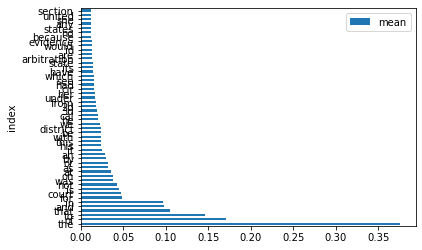

In [41]:
common_words_charts(relevant)

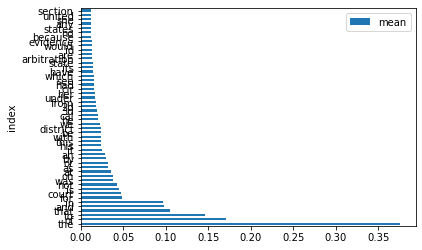

In [42]:
common_words_charts(relevant)

In [43]:
relevant

,00,000,001,002,003,01,010,02,020,03,...,zheng,zhou,zhu,zimmer,zimmerman,zip,zone,zones,zoning,zurich
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.002350,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.003497,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.004740,0.0,0.0,0.0,0.0,0.0,0.007782,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22157,0.0,0.005430,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22158,0.0,0.009801,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22159,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22160,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# neural Net

In [253]:
from keras import models
from keras import layers
from keras import optimizers
from keras.models import Sequential


from tensorflow.python.keras.engine.data_adapter import DatasetAdapter
from sklearn import preprocessing

from keras.callbacks import EarlyStopping

In [ ]:
y = pd.get_dummies(ngram3_trainy).values

In [274]:
model = models.Sequential()

model.add(layers.Dense(10000, activation='tanh', input_shape=(2301,)))
model.add(layers.Dense(25, activation='tanh'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1000, activation='tanh'))
model.add(layers.Dense(1000, activation='tanh'))
model.add(layers.Dense(1000, activation='tanh'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1000, activation='tanh'))

model.add(layers.Dense(20, activation='tanh'))

In [275]:
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [276]:
history = model.fit(ngram3_trainX,
                    ngram3_trainy,
                    epochs=100,
                    batch_size=10,
                    validation_data=(ngram3_testX, ngram3_testy))

Epoch 1/100
1773/1773 [==============================] - 100s 56ms/step - loss: 8.2261 - accuracy: 0.0395 - val_loss: 8.9044 - val_accuracy: 0.0379
Epoch 2/100
1773/1773 [==============================] - 99s 56ms/step - loss: 8.3350 - accuracy: 0.0393 - val_loss: 8.9044 - val_accuracy: 0.0379
Epoch 3/100
1773/1773 [==============================] - 99s 56ms/step - loss: 8.2604 - accuracy: 0.0393 - val_loss: 8.9044 - val_accuracy: 0.0379
Epoch 4/100
1773/1773 [==============================] - 99s 56ms/step - loss: 8.3123 - accuracy: 0.0393 - val_loss: 8.9044 - val_accuracy: 0.0379
Epoch 5/100
1773/1773 [==============================] - 100s 57ms/step - loss: 8.3368 - accuracy: 0.0393 - val_loss: 8.9044 - val_accuracy: 0.0379
Epoch 6/100
1773/1773 [==============================] - 99s 56ms/step - loss: 8.3359 - accuracy: 0.0393 - val_loss: 8.9044 - val_accuracy: 0.0379
Epoch 7/100
1773/1773 [==============================] - 100s 57ms/step - loss: 8.3250 - accuracy: 0.0393 - val_loss

KeyboardInterrupt: 

In [51]:
ngram3_trainX=ngram3_trainX.iloc[:, 1:-1 ]

In [278]:
ngram3_trainX.shape

(17729, 2301)

In [235]:
ngram3_trainX=np.array(ngram3_trainX)

In [219]:
from sklearn import preprocessing
from keras.utils.np_utils import to_categorical
le = preprocessing.LabelEncoder()
le.fit(ngram3_trainy)

le

LabelEncoder()

In [220]:
ngram3_trainy=le.transform(ngram3_trainy)

In [221]:
ngram3_trainy=to_categorical(ngram3_trainy)

In [277]:
type(np.array(ngram3_trainX))

numpy.ndarray

In [71]:
# ngram3_trainy=np.asarray(ngram3_trainy)

In [225]:
np.unique(ngram3_trainy)

array([0., 1.], dtype=float32)

In [279]:
ngram3_trainy.shape

(17729, 20)

# test set

In [244]:
ngram3_testX=np.array(ngram3_testX)

In [245]:
le = preprocessing.LabelEncoder()
le.fit(ngram3_testy)

ngram3_testy=le.transform(ngram3_testy)

In [246]:
ngram3_testy=to_categorical(ngram3_testy)

In [238]:
def makelosstraining(modelob):
    if 'accuracy' in modelob.history.keys():
        training_loss = modelob.history['loss']
        test_loss = modelob.history['val_loss']

        training_acc = modelob.history['accuracy']
        test_acc = modelob.history['val_accuracy']

        # Create count of the number of epochs
        epoch_count = range(1, len(training_loss) + 1)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

        # Visualize loss history
        ax1.plot(epoch_count, training_loss, 'r--')
        ax1.plot(epoch_count, test_loss, 'b-')
        ax1.legend(['Training Loss', 'Test Loss'])

        # Visualize accuracy  history
        ax2.plot(epoch_count, training_acc, 'r--')
        ax2.plot(epoch_count, test_acc, 'b-')
        ax2.legend(['Training Accuracy', 'Test Accuracy'])

        fig.show();
    else:
        training_loss = modelob.history['loss']
        test_loss = modelob.history['val_loss']

        training_acc = modelob.history['acc']
        test_acc = modelob.history['val_acc']

        # Create count of the number of epochs
        epoch_count = range(1, len(training_loss) + 1)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

        # Visualize loss history
        ax1.plot(epoch_count, training_loss, 'r--')
        ax1.plot(epoch_count, test_loss, 'b-')
        ax1.legend(['Training Loss', 'Test Loss'])

        # Visualize accuracy  history
        ax2.plot(epoch_count, training_acc, 'r--')
        ax2.plot(epoch_count, test_acc, 'b-')
        ax2.legend(['Training Accuracy', 'Test Accuracy'])

        fig.show();

# lstm

In [261]:
model2 = models.Sequential()

model2.add(layers.Embedding(input_dim=2301, output_dim=64))
model2.add(layers.LSTM(units=10,activation='tanh'))
model2.add(layers.Dropout(0.3))
model2.add(layers.Dense(100, activation='softmax'))
model2.add(layers.Dense(100, activation='softmax'))
model2.add(layers.Dense(1000, activation='softmax'))
model2.add(layers.Dropout(0.3))
model2.add(layers.Dense(100, activation='softmax'))

model2.add(layers.Dense(20, activation='softmax'))

In [284]:
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [289]:
history2 = model2.fit(ngram3_trainX,
                    ngram3_trainy,
                    epochs=100,
                    batch_size=300,
                    validation_data=(ngram3_testX, ngram3_testy))

RuntimeError: Data adapters should be mutually exclusive for handling inputs. Found multiple adapters [<class 'tensorflow.python.keras.engine.data_adapter.TensorLikeDataAdapter'>, <class 'tensorflow.python.keras.engine.data_adapter.GeneratorDataAdapter'>] to handle input: <class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.series.Series'>

# break it 

In [280]:
def batch_generator(X_data, y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(y_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch,:].toarray()
        y_batch = y_data[y_data.index[index_batch]]
        counter += 1
        yield X_batch,y_batch
        if (counter > number_of_batches):
            counter=0